# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

### 4. Train the agents!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
from MADDPG_agent import MADDPG
import torch
from collections import deque
from matplotlib import pyplot as plt

In [7]:
agent = MADDPG()
n_episodes = 4000
max_t = 1000
scores = []
scores_deque = deque(maxlen=100)
scores_avg = []

for i_episode in range(1, n_episodes+1):
    rewards = []
    env_info = env.reset(train_mode=True)[brain_name]    # reset the environment    
    state = env_info.vector_observations                  # get the current state (for each agent)

    # loop over steps
    for t in range(max_t):
        # select an action
        action = agent.act(state)
        # take action in environment and set parameters to new values
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations
        rewards_vec = env_info.rewards
        done = env_info.local_done
        # update and train agent with returned information
        agent.step(state, action, rewards_vec, next_state, done)
        state = next_state
        rewards.append(rewards_vec)
        if any(done):
            break

    # calculate episode reward as maximum of individually collected rewards of agents
    max_reward = np.max(np.sum(np.array(rewards),axis=0))
        
    scores.append(max_reward)             # save most recent score to overall score array
    scores_deque.append(max_reward)       # save most recent score to running window of 100 last scores
    current_avg_score = np.mean(scores_deque)
    scores_avg.append(current_avg_score)      # save average of last 100 scores to average score array
    
    print('\rEpisode {}\tAverage Score: {:.3f}\tCurrent Score: {:.3f}'.format(i_episode, current_avg_score, max_reward))
    

    # break and report success if environment is solved
    if np.mean(scores_deque)>=.5:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.3f}'.format(i_episode, np.mean(scores_deque)))
        agent.save_agents()
        break

D:\anaconda\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 1	Average Score: 0.000	Current Score: 0.000
Episode 2	Average Score: 0.000	Current Score: 0.000
Episode 3	Average Score: 0.000	Current Score: 0.000
Episode 4	Average Score: 0.000	Current Score: 0.000
Episode 5	Average Score: 0.000	Current Score: 0.000
Episode 6	Average Score: 0.000	Current Score: 0.000
Episode 7	Average Score: 0.000	Current Score: 0.000
Episode 8	Average Score: 0.000	Current Score: 0.000
Episode 9	Average Score: 0.011	Current Score: 0.100
Episode 10	Average Score: 0.010	Current Score: 0.000
Episode 11	Average Score: 0.009	Current Score: 0.000
Episode 12	Average Score: 0.008	Current Score: 0.000
Episode 13	Average Score: 0.008	Current Score: 0.000
Episode 14	Average Score: 0.007	Current Score: 0.000
Episode 15	Average Score: 0.007	Current Score: 0.000
Episode 16	Average Score: 0.006	Current Score: 0.000
Episode 17	Average Score: 0.006	Current Score: 0.000
Episode 18	Average Score: 0.006	Current Score: 0.000
Episode 19	Average Score: 0.005	Current Score: 0.000
Ep

Episode 154	Average Score: 0.025	Current Score: 0.000
Episode 155	Average Score: 0.025	Current Score: 0.000
Episode 156	Average Score: 0.025	Current Score: 0.000
Episode 157	Average Score: 0.025	Current Score: 0.000
Episode 158	Average Score: 0.025	Current Score: 0.000
Episode 159	Average Score: 0.025	Current Score: 0.000
Episode 160	Average Score: 0.024	Current Score: 0.000
Episode 161	Average Score: 0.024	Current Score: 0.000
Episode 162	Average Score: 0.024	Current Score: 0.000
Episode 163	Average Score: 0.024	Current Score: 0.000
Episode 164	Average Score: 0.023	Current Score: 0.000
Episode 165	Average Score: 0.022	Current Score: 0.000
Episode 166	Average Score: 0.021	Current Score: 0.000
Episode 167	Average Score: 0.021	Current Score: 0.000
Episode 168	Average Score: 0.020	Current Score: 0.000
Episode 169	Average Score: 0.020	Current Score: 0.000
Episode 170	Average Score: 0.020	Current Score: 0.000
Episode 171	Average Score: 0.020	Current Score: 0.000
Episode 172	Average Score: 0

Episode 305	Average Score: 0.002	Current Score: 0.000
Episode 306	Average Score: 0.002	Current Score: 0.000
Episode 307	Average Score: 0.002	Current Score: 0.000
Episode 308	Average Score: 0.002	Current Score: 0.000
Episode 309	Average Score: 0.002	Current Score: 0.000
Episode 310	Average Score: 0.002	Current Score: 0.000
Episode 311	Average Score: 0.002	Current Score: 0.000
Episode 312	Average Score: 0.002	Current Score: 0.000
Episode 313	Average Score: 0.002	Current Score: 0.000
Episode 314	Average Score: 0.002	Current Score: 0.000
Episode 315	Average Score: 0.002	Current Score: 0.000
Episode 316	Average Score: 0.003	Current Score: 0.090
Episode 317	Average Score: 0.003	Current Score: 0.000
Episode 318	Average Score: 0.003	Current Score: 0.000
Episode 319	Average Score: 0.003	Current Score: 0.000
Episode 320	Average Score: 0.003	Current Score: 0.000
Episode 321	Average Score: 0.003	Current Score: 0.000
Episode 322	Average Score: 0.003	Current Score: 0.000
Episode 323	Average Score: 0

Episode 456	Average Score: 0.012	Current Score: 0.000
Episode 457	Average Score: 0.012	Current Score: 0.000
Episode 458	Average Score: 0.012	Current Score: 0.000
Episode 459	Average Score: 0.012	Current Score: 0.000
Episode 460	Average Score: 0.012	Current Score: 0.000
Episode 461	Average Score: 0.012	Current Score: 0.000
Episode 462	Average Score: 0.012	Current Score: 0.000
Episode 463	Average Score: 0.012	Current Score: 0.000
Episode 464	Average Score: 0.012	Current Score: 0.000
Episode 465	Average Score: 0.011	Current Score: 0.000
Episode 466	Average Score: 0.011	Current Score: 0.000
Episode 467	Average Score: 0.011	Current Score: 0.000
Episode 468	Average Score: 0.011	Current Score: 0.000
Episode 469	Average Score: 0.011	Current Score: 0.000
Episode 470	Average Score: 0.011	Current Score: 0.000
Episode 471	Average Score: 0.011	Current Score: 0.000
Episode 472	Average Score: 0.011	Current Score: 0.000
Episode 473	Average Score: 0.011	Current Score: 0.000
Episode 474	Average Score: 0

Episode 607	Average Score: 0.032	Current Score: 0.100
Episode 608	Average Score: 0.032	Current Score: 0.000
Episode 609	Average Score: 0.032	Current Score: 0.000
Episode 610	Average Score: 0.033	Current Score: 0.090
Episode 611	Average Score: 0.034	Current Score: 0.090
Episode 612	Average Score: 0.034	Current Score: 0.100
Episode 613	Average Score: 0.033	Current Score: 0.000
Episode 614	Average Score: 0.033	Current Score: 0.000
Episode 615	Average Score: 0.032	Current Score: 0.000
Episode 616	Average Score: 0.032	Current Score: 0.000
Episode 617	Average Score: 0.032	Current Score: 0.090
Episode 618	Average Score: 0.031	Current Score: 0.000
Episode 619	Average Score: 0.031	Current Score: 0.000
Episode 620	Average Score: 0.030	Current Score: 0.000
Episode 621	Average Score: 0.030	Current Score: 0.000
Episode 622	Average Score: 0.030	Current Score: 0.000
Episode 623	Average Score: 0.031	Current Score: 0.090
Episode 624	Average Score: 0.031	Current Score: 0.000
Episode 625	Average Score: 0

Episode 758	Average Score: 0.036	Current Score: 0.000
Episode 759	Average Score: 0.035	Current Score: 0.000
Episode 760	Average Score: 0.035	Current Score: 0.000
Episode 761	Average Score: 0.034	Current Score: 0.000
Episode 762	Average Score: 0.034	Current Score: 0.000
Episode 763	Average Score: 0.034	Current Score: 0.000
Episode 764	Average Score: 0.034	Current Score: 0.000
Episode 765	Average Score: 0.034	Current Score: 0.000
Episode 766	Average Score: 0.033	Current Score: 0.000
Episode 767	Average Score: 0.033	Current Score: 0.000
Episode 768	Average Score: 0.033	Current Score: 0.000
Episode 769	Average Score: 0.034	Current Score: 0.100
Episode 770	Average Score: 0.034	Current Score: 0.000
Episode 771	Average Score: 0.034	Current Score: 0.000
Episode 772	Average Score: 0.034	Current Score: 0.000
Episode 773	Average Score: 0.035	Current Score: 0.100
Episode 774	Average Score: 0.035	Current Score: 0.000
Episode 775	Average Score: 0.035	Current Score: 0.100
Episode 776	Average Score: 0

Episode 909	Average Score: 0.024	Current Score: 0.000
Episode 910	Average Score: 0.023	Current Score: 0.000
Episode 911	Average Score: 0.023	Current Score: 0.000
Episode 912	Average Score: 0.022	Current Score: 0.000
Episode 913	Average Score: 0.021	Current Score: 0.000
Episode 914	Average Score: 0.021	Current Score: 0.000
Episode 915	Average Score: 0.021	Current Score: 0.000
Episode 916	Average Score: 0.020	Current Score: 0.000
Episode 917	Average Score: 0.020	Current Score: 0.000
Episode 918	Average Score: 0.020	Current Score: 0.000
Episode 919	Average Score: 0.020	Current Score: 0.000
Episode 920	Average Score: 0.020	Current Score: 0.000
Episode 921	Average Score: 0.020	Current Score: 0.000
Episode 922	Average Score: 0.020	Current Score: 0.000
Episode 923	Average Score: 0.020	Current Score: 0.000
Episode 924	Average Score: 0.020	Current Score: 0.000
Episode 925	Average Score: 0.019	Current Score: 0.000
Episode 926	Average Score: 0.019	Current Score: 0.000
Episode 927	Average Score: 0

Episode 1059	Average Score: 0.041	Current Score: 0.090
Episode 1060	Average Score: 0.042	Current Score: 0.100
Episode 1061	Average Score: 0.043	Current Score: 0.100
Episode 1062	Average Score: 0.043	Current Score: 0.090
Episode 1063	Average Score: 0.043	Current Score: 0.000
Episode 1064	Average Score: 0.044	Current Score: 0.100
Episode 1065	Average Score: 0.044	Current Score: 0.000
Episode 1066	Average Score: 0.044	Current Score: 0.090
Episode 1067	Average Score: 0.044	Current Score: 0.000
Episode 1068	Average Score: 0.044	Current Score: 0.000
Episode 1069	Average Score: 0.044	Current Score: 0.000
Episode 1070	Average Score: 0.044	Current Score: 0.000
Episode 1071	Average Score: 0.044	Current Score: 0.000
Episode 1072	Average Score: 0.044	Current Score: 0.000
Episode 1073	Average Score: 0.044	Current Score: 0.100
Episode 1074	Average Score: 0.044	Current Score: 0.000
Episode 1075	Average Score: 0.044	Current Score: 0.000
Episode 1076	Average Score: 0.045	Current Score: 0.090
Episode 10

Episode 1207	Average Score: 0.043	Current Score: 0.100
Episode 1208	Average Score: 0.044	Current Score: 0.100
Episode 1209	Average Score: 0.045	Current Score: 0.100
Episode 1210	Average Score: 0.046	Current Score: 0.100
Episode 1211	Average Score: 0.046	Current Score: 0.100
Episode 1212	Average Score: 0.047	Current Score: 0.100
Episode 1213	Average Score: 0.047	Current Score: 0.100
Episode 1214	Average Score: 0.048	Current Score: 0.100
Episode 1215	Average Score: 0.049	Current Score: 0.100
Episode 1216	Average Score: 0.049	Current Score: 0.000
Episode 1217	Average Score: 0.049	Current Score: 0.000
Episode 1218	Average Score: 0.050	Current Score: 0.100
Episode 1219	Average Score: 0.051	Current Score: 0.100
Episode 1220	Average Score: 0.051	Current Score: 0.000
Episode 1221	Average Score: 0.051	Current Score: 0.100
Episode 1222	Average Score: 0.051	Current Score: 0.000
Episode 1223	Average Score: 0.051	Current Score: 0.000
Episode 1224	Average Score: 0.051	Current Score: 0.000
Episode 12

Episode 1355	Average Score: 0.054	Current Score: 0.100
Episode 1356	Average Score: 0.054	Current Score: 0.000
Episode 1357	Average Score: 0.054	Current Score: 0.000
Episode 1358	Average Score: 0.054	Current Score: 0.100
Episode 1359	Average Score: 0.055	Current Score: 0.100
Episode 1360	Average Score: 0.055	Current Score: 0.100
Episode 1361	Average Score: 0.055	Current Score: 0.100
Episode 1362	Average Score: 0.054	Current Score: 0.000
Episode 1363	Average Score: 0.052	Current Score: 0.000
Episode 1364	Average Score: 0.052	Current Score: 0.090
Episode 1365	Average Score: 0.052	Current Score: 0.100
Episode 1366	Average Score: 0.051	Current Score: 0.000
Episode 1367	Average Score: 0.052	Current Score: 0.100
Episode 1368	Average Score: 0.053	Current Score: 0.100
Episode 1369	Average Score: 0.053	Current Score: 0.000
Episode 1370	Average Score: 0.054	Current Score: 0.100
Episode 1371	Average Score: 0.054	Current Score: 0.100
Episode 1372	Average Score: 0.054	Current Score: 0.100
Episode 13

Episode 1503	Average Score: 0.112	Current Score: 0.000
Episode 1504	Average Score: 0.112	Current Score: 0.100
Episode 1505	Average Score: 0.112	Current Score: 0.100
Episode 1506	Average Score: 0.112	Current Score: 0.000
Episode 1507	Average Score: 0.111	Current Score: 0.100
Episode 1508	Average Score: 0.112	Current Score: 0.090
Episode 1509	Average Score: 0.112	Current Score: 0.090
Episode 1510	Average Score: 0.111	Current Score: 0.000
Episode 1511	Average Score: 0.109	Current Score: 0.090
Episode 1512	Average Score: 0.110	Current Score: 0.100
Episode 1513	Average Score: 0.110	Current Score: 0.100
Episode 1514	Average Score: 0.109	Current Score: 0.100
Episode 1515	Average Score: 0.109	Current Score: 0.100
Episode 1516	Average Score: 0.108	Current Score: 0.000
Episode 1517	Average Score: 0.108	Current Score: 0.000
Episode 1518	Average Score: 0.108	Current Score: 0.090
Episode 1519	Average Score: 0.107	Current Score: 0.000
Episode 1520	Average Score: 0.104	Current Score: 0.100
Episode 15

Episode 1651	Average Score: 0.113	Current Score: 0.090
Episode 1652	Average Score: 0.112	Current Score: 0.090
Episode 1653	Average Score: 0.112	Current Score: 0.000
Episode 1654	Average Score: 0.112	Current Score: 0.000
Episode 1655	Average Score: 0.098	Current Score: 0.100
Episode 1656	Average Score: 0.101	Current Score: 0.300
Episode 1657	Average Score: 0.101	Current Score: 0.090
Episode 1658	Average Score: 0.100	Current Score: 0.100
Episode 1659	Average Score: 0.099	Current Score: 0.100
Episode 1660	Average Score: 0.100	Current Score: 0.200
Episode 1661	Average Score: 0.100	Current Score: 0.090
Episode 1662	Average Score: 0.099	Current Score: 0.100
Episode 1663	Average Score: 0.100	Current Score: 0.090
Episode 1664	Average Score: 0.101	Current Score: 0.100
Episode 1665	Average Score: 0.100	Current Score: 0.000
Episode 1666	Average Score: 0.100	Current Score: 0.100
Episode 1667	Average Score: 0.098	Current Score: 0.090
Episode 1668	Average Score: 0.098	Current Score: 0.000
Episode 16

Episode 1799	Average Score: 0.083	Current Score: 0.090
Episode 1800	Average Score: 0.083	Current Score: 0.090
Episode 1801	Average Score: 0.083	Current Score: 0.090
Episode 1802	Average Score: 0.083	Current Score: 0.090
Episode 1803	Average Score: 0.083	Current Score: 0.090
Episode 1804	Average Score: 0.083	Current Score: 0.090
Episode 1805	Average Score: 0.083	Current Score: 0.100
Episode 1806	Average Score: 0.082	Current Score: 0.000
Episode 1807	Average Score: 0.082	Current Score: 0.090
Episode 1808	Average Score: 0.082	Current Score: 0.100
Episode 1809	Average Score: 0.083	Current Score: 0.090
Episode 1810	Average Score: 0.083	Current Score: 0.090
Episode 1811	Average Score: 0.082	Current Score: 0.000
Episode 1812	Average Score: 0.082	Current Score: 0.100
Episode 1813	Average Score: 0.082	Current Score: 0.090
Episode 1814	Average Score: 0.081	Current Score: 0.000
Episode 1815	Average Score: 0.082	Current Score: 0.100
Episode 1816	Average Score: 0.081	Current Score: 0.000
Episode 18

Episode 1947	Average Score: 0.176	Current Score: 0.300
Episode 1948	Average Score: 0.177	Current Score: 0.200
Episode 1949	Average Score: 0.179	Current Score: 0.200
Episode 1950	Average Score: 0.176	Current Score: 0.000
Episode 1951	Average Score: 0.176	Current Score: 0.500
Episode 1952	Average Score: 0.176	Current Score: 0.100
Episode 1953	Average Score: 0.178	Current Score: 0.300
Episode 1954	Average Score: 0.183	Current Score: 0.600
Episode 1955	Average Score: 0.183	Current Score: 0.100
Episode 1956	Average Score: 0.182	Current Score: 0.000
Episode 1957	Average Score: 0.182	Current Score: 0.200
Episode 1958	Average Score: 0.181	Current Score: 0.000
Episode 1959	Average Score: 0.180	Current Score: 0.000
Episode 1960	Average Score: 0.179	Current Score: 0.000
Episode 1961	Average Score: 0.180	Current Score: 0.100
Episode 1962	Average Score: 0.179	Current Score: 0.100
Episode 1963	Average Score: 0.183	Current Score: 0.500
Episode 1964	Average Score: 0.183	Current Score: 0.000
Episode 19

Episode 2095	Average Score: 0.255	Current Score: 0.400
Episode 2096	Average Score: 0.254	Current Score: 0.000
Episode 2097	Average Score: 0.252	Current Score: 0.190
Episode 2098	Average Score: 0.251	Current Score: 0.200
Episode 2099	Average Score: 0.256	Current Score: 0.900
Episode 2100	Average Score: 0.264	Current Score: 0.900
Episode 2101	Average Score: 0.264	Current Score: 0.100
Episode 2102	Average Score: 0.271	Current Score: 1.100
Episode 2103	Average Score: 0.270	Current Score: 0.100
Episode 2104	Average Score: 0.272	Current Score: 0.500
Episode 2105	Average Score: 0.269	Current Score: 0.000
Episode 2106	Average Score: 0.268	Current Score: 0.000
Episode 2107	Average Score: 0.255	Current Score: 0.100
Episode 2108	Average Score: 0.255	Current Score: 0.000
Episode 2109	Average Score: 0.263	Current Score: 0.900
Episode 2110	Average Score: 0.262	Current Score: 0.300
Episode 2111	Average Score: 0.257	Current Score: 0.000
Episode 2112	Average Score: 0.260	Current Score: 0.700
Episode 21

Episode 2243	Average Score: 0.254	Current Score: 0.590
Episode 2244	Average Score: 0.249	Current Score: 0.200
Episode 2245	Average Score: 0.257	Current Score: 1.200
Episode 2246	Average Score: 0.255	Current Score: 0.100
Episode 2247	Average Score: 0.252	Current Score: 0.300
Episode 2248	Average Score: 0.249	Current Score: 0.200
Episode 2249	Average Score: 0.253	Current Score: 0.500
Episode 2250	Average Score: 0.252	Current Score: 0.000
Episode 2251	Average Score: 0.250	Current Score: 0.100
Episode 2252	Average Score: 0.249	Current Score: 0.100
Episode 2253	Average Score: 0.251	Current Score: 0.200
Episode 2254	Average Score: 0.251	Current Score: 0.100
Episode 2255	Average Score: 0.248	Current Score: 0.100
Episode 2256	Average Score: 0.251	Current Score: 0.500
Episode 2257	Average Score: 0.251	Current Score: 0.100
Episode 2258	Average Score: 0.251	Current Score: 0.100
Episode 2259	Average Score: 0.251	Current Score: 0.100
Episode 2260	Average Score: 0.251	Current Score: 0.100
Episode 22

Episode 2391	Average Score: 0.208	Current Score: 0.100
Episode 2392	Average Score: 0.208	Current Score: 0.000
Episode 2393	Average Score: 0.208	Current Score: 0.100
Episode 2394	Average Score: 0.208	Current Score: 0.000
Episode 2395	Average Score: 0.206	Current Score: 0.100
Episode 2396	Average Score: 0.206	Current Score: 0.100
Episode 2397	Average Score: 0.207	Current Score: 0.100
Episode 2398	Average Score: 0.201	Current Score: 0.000
Episode 2399	Average Score: 0.194	Current Score: 0.090
Episode 2400	Average Score: 0.193	Current Score: 0.100
Episode 2401	Average Score: 0.190	Current Score: 0.100
Episode 2402	Average Score: 0.184	Current Score: 0.000
Episode 2403	Average Score: 0.183	Current Score: 0.100
Episode 2404	Average Score: 0.180	Current Score: 0.100
Episode 2405	Average Score: 0.179	Current Score: 0.200
Episode 2406	Average Score: 0.179	Current Score: 0.100
Episode 2407	Average Score: 0.177	Current Score: 0.090
Episode 2408	Average Score: 0.177	Current Score: 0.100
Episode 24

Episode 2539	Average Score: 0.151	Current Score: 0.300
Episode 2540	Average Score: 0.151	Current Score: 0.100
Episode 2541	Average Score: 0.151	Current Score: 0.200
Episode 2542	Average Score: 0.152	Current Score: 0.100
Episode 2543	Average Score: 0.152	Current Score: 0.100
Episode 2544	Average Score: 0.152	Current Score: 0.100
Episode 2545	Average Score: 0.152	Current Score: 0.200
Episode 2546	Average Score: 0.155	Current Score: 0.500
Episode 2547	Average Score: 0.155	Current Score: 0.100
Episode 2548	Average Score: 0.155	Current Score: 0.100
Episode 2549	Average Score: 0.154	Current Score: 0.000
Episode 2550	Average Score: 0.153	Current Score: 0.000
Episode 2551	Average Score: 0.153	Current Score: 0.300
Episode 2552	Average Score: 0.162	Current Score: 1.000
Episode 2553	Average Score: 0.160	Current Score: 0.000
Episode 2554	Average Score: 0.160	Current Score: 0.100
Episode 2555	Average Score: 0.160	Current Score: 0.100
Episode 2556	Average Score: 0.161	Current Score: 0.200
Episode 25

Episode 2687	Average Score: 0.293	Current Score: 0.000
Episode 2688	Average Score: 0.293	Current Score: 0.200
Episode 2689	Average Score: 0.284	Current Score: 0.000
Episode 2690	Average Score: 0.279	Current Score: 0.000
Episode 2691	Average Score: 0.278	Current Score: 0.000
Episode 2692	Average Score: 0.274	Current Score: 0.000
Episode 2693	Average Score: 0.274	Current Score: 0.200
Episode 2694	Average Score: 0.269	Current Score: 0.000
Episode 2695	Average Score: 0.267	Current Score: 0.300
Episode 2696	Average Score: 0.259	Current Score: 0.000
Episode 2697	Average Score: 0.258	Current Score: 0.000
Episode 2698	Average Score: 0.256	Current Score: 0.200
Episode 2699	Average Score: 0.244	Current Score: 0.000
Episode 2700	Average Score: 0.243	Current Score: 0.000
Episode 2701	Average Score: 0.244	Current Score: 0.200
Episode 2702	Average Score: 0.247	Current Score: 0.500
Episode 2703	Average Score: 0.246	Current Score: 0.000
Episode 2704	Average Score: 0.242	Current Score: 0.000
Episode 27

Episode 2835	Average Score: 0.460	Current Score: 0.100
Episode 2836	Average Score: 0.460	Current Score: 0.100
Episode 2837	Average Score: 0.468	Current Score: 0.900
Episode 2838	Average Score: 0.479	Current Score: 1.100
Episode 2839	Average Score: 0.477	Current Score: 0.100
Episode 2840	Average Score: 0.476	Current Score: 0.000
Episode 2841	Average Score: 0.482	Current Score: 0.700
Episode 2842	Average Score: 0.478	Current Score: 0.100
Episode 2843	Average Score: 0.467	Current Score: 0.100
Episode 2844	Average Score: 0.461	Current Score: 0.100
Episode 2845	Average Score: 0.458	Current Score: 0.100
Episode 2846	Average Score: 0.455	Current Score: 0.300
Episode 2847	Average Score: 0.456	Current Score: 0.100
Episode 2848	Average Score: 0.460	Current Score: 0.400
Episode 2849	Average Score: 0.485	Current Score: 2.600
Episode 2850	Average Score: 0.487	Current Score: 0.190
Episode 2851	Average Score: 0.488	Current Score: 0.100
Episode 2852	Average Score: 0.463	Current Score: 0.090
Episode 28

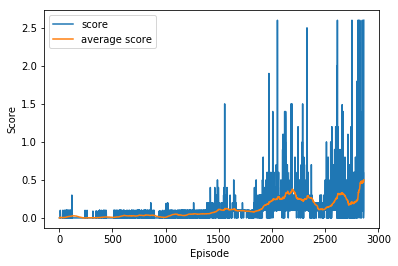

In [8]:
#plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores, label='score')
plt.plot(np.arange(1, len(scores)+1), scores_avg,  label='average score')
plt.ylabel('Score')
plt.xlabel('Episode ')
plt.legend()
plt.savefig('score.png', dpi = 720)
plt.show()

In [9]:
#See the trained agent animation
for i in range(1, 10):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = agent.act(states, add_noise=False) # select an action (for each agent)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))


D:\anaconda\lib\site-packages\torch\nn\functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Score (max over agents) from episode 1: 0.10000000149011612
Score (max over agents) from episode 2: 0.09000000171363354
Score (max over agents) from episode 3: 0.10000000149011612
Score (max over agents) from episode 4: 1.0000000149011612
Score (max over agents) from episode 5: 2.600000038743019
Score (max over agents) from episode 6: 0.10000000149011612
Score (max over agents) from episode 7: 0.09000000171363354
Score (max over agents) from episode 8: 0.30000000447034836
Score (max over agents) from episode 9: 0.10000000149011612


In [10]:
env.close()